In [1]:
# script to plot all 12 tables of ignition delays

In [1]:
import os
import numpy as np
import pandas as pd
import cantera as ct

# import colormaps
import seaborn as sns

import matplotlib.colors as mcolors

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the experimental conditions
ignition_delay_data = '/work/westgroup/harris.se/autoscience/autoscience/butane/experimental_data/butane_ignition_delay.csv'
df_exp = pd.read_csv(ignition_delay_data)

# slice just table 7, where phi=1.0
table7 = df_exp[df_exp['Table'] == 7]
# Define Initial conditions using experimental data
tau7 = table7['time (ms)'].values.astype(float)  # ignition delay
T7 = table7['T_C'].values  # Temperatures
P7 = table7['nominal pressure(atm)'].values * ct.one_atm  # pressures in atm


# list of starting conditions
# Mixture compositions taken from table 2 of
# https://doi-org.ezproxy.neu.edu/10.1016/j.combustflame.2010.01.016
concentrations = []
# for phi = 1
x_diluent = 0.7649
conc_dict = {
    'O2(2)': 0.2038,
    'butane(1)': 0.03135
}

for i in range(0, len(table7)):
    x_N2 = table7['%N2'].values[i] / 100.0 * x_diluent
    x_Ar = table7['%Ar'].values[i] / 100.0 * x_diluent
    x_CO2 = table7['%CO2'].values[i] / 100.0 * x_diluent
    conc_dict['N2'] = x_N2
    conc_dict['Ar'] = x_Ar
    conc_dict['CO2(7)'] = x_CO2
    concentrations.append(conc_dict)



In [3]:
# print(this_table)

In [4]:
# scale the delays to the nominal pressure
for i in range(1, 13):
    this_table = df_exp[df_exp['Table'] == i]
    nominal_pressure = this_table['nominal pressure(atm)'].values[0]
    actual_pressures = this_table['chamber pressure? (bar)'].values  # yes, confirmed units of bar here and atm there
    
    
    # get the concentrations
    concentrations = []
    # for phi = 1
    x_diluent = 0.7649
    conc_dict = {
        'O2(2)': 0.2038,
        'butane(1)': 0.03135
    }

    for i in range(0, len(table7)):
        x_N2 = table7['%N2'].values[i] / 100.0 * x_diluent
        x_Ar = table7['%Ar'].values[i] / 100.0 * x_diluent
        x_CO2 = table7['%CO2'].values[i] / 100.0 * x_diluent
        conc_dict['N2'] = x_N2
        conc_dict['Ar'] = x_Ar
        conc_dict['CO2(7)'] = x_CO2
        concentrations.append(conc_dict)

    break
    # actual_pressure
    # print(this_table)



In [5]:
working_dir = '/work/westgroup/harris.se/autoscience/reaction_calculator/delay_uncertainty/'

In [6]:
Tmax = 1077  # use min and max temperature range of the data: 663K-1077K
Tmin = 663
N = 51
temperatures = np.linspace(Tmin, Tmax, N)


In [7]:
def get_table_phi(table_index):
    return df_exp[df_exp['Table'] == table_index]['phi'].values[0]

In [8]:
def get_table_pressure(table_index):
    return df_exp[df_exp['Table'] == table_index]['nominal pressure(atm)'].values[0]

In [9]:
# get_table_phi(7)

In [10]:
def scale_experimental_delay(original_delay, experimental_pressure, nominal_pressure, T):
    scale_factor = nominal_pressure / experimental_pressure
    if T < 1175:
        return original_delay * np.float_power(scale_factor, -0.34 - 0.70)
    else:
        return original_delay * np.float_power(scale_factor, 0.16 - 0.73)
        

In [11]:
temperatures

array([ 663.  ,  671.28,  679.56,  687.84,  696.12,  704.4 ,  712.68,
        720.96,  729.24,  737.52,  745.8 ,  754.08,  762.36,  770.64,
        778.92,  787.2 ,  795.48,  803.76,  812.04,  820.32,  828.6 ,
        836.88,  845.16,  853.44,  861.72,  870.  ,  878.28,  886.56,
        894.84,  903.12,  911.4 ,  919.68,  927.96,  936.24,  944.52,
        952.8 ,  961.08,  969.36,  977.64,  985.92,  994.2 , 1002.48,
       1010.76, 1019.04, 1027.32, 1035.6 , 1043.88, 1052.16, 1060.44,
       1068.72, 1077.  ])

In [12]:
colors[6]

/work/westgroup/harris.se/tst_env/lib/python3.7/site-packages/IPython/core/magics/basic.py:343: UserWarning: Error changing shell color schemes.
The 'colors' trait of a ZMQInteractiveShell instance expected any of ['Neutral', 'NoColor', 'LightBG', 'Linux'] (case-insensitive), not the str '[6]'.
  color_switch_err('shell')
/work/westgroup/harris.se/tst_env/lib/python3.7/site-packages/IPython/core/magics/basic.py:350: UserWarning: Error changing exception color schemes.
Unrecognized color scheme: [6]
Valid schemes: ['NoColor', 'Linux', 'LightBG', 'Neutral', '']
  color_switch_err('exception')
/work/westgroup/harris.se/tst_env/lib/python3.7/site-packages/IPython/core/magics/basic.py:357: UserWarning: Error changing object inspector color schemes.
Unrecognized color scheme: [6]
Valid schemes: ['NoColor', 'Linux', 'LightBG', 'Neutral', '']
  color_switch_err('object inspector')


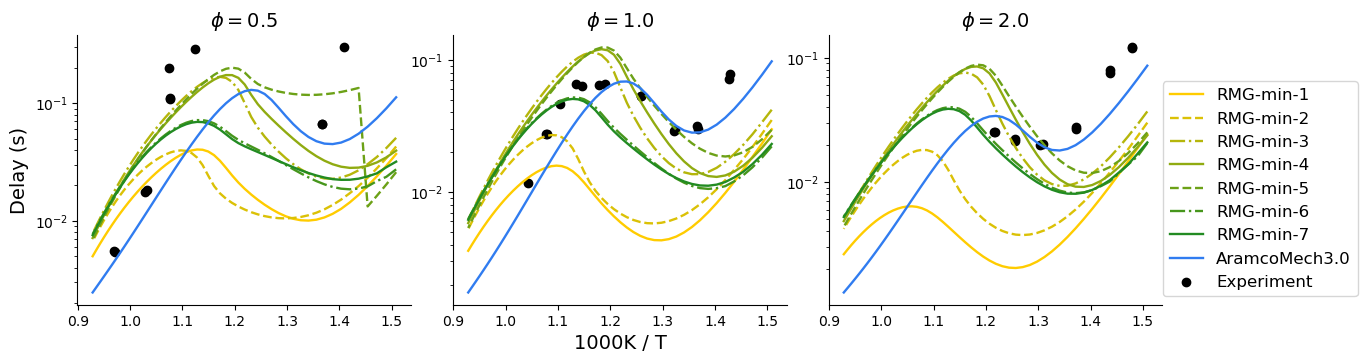

In [13]:
# read im the 12 datasets
# colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))


# P = 10
# colors = [matplotlib.colormaps['viridis'].colors[:: -1][int(i / P * matplotlib.colormaps['viridis'].N)] for i in range(P)]
# colors[0] = matplotlib.colormaps['viridis'].colors[:: -1][0]
# colors[1] = matplotlib.colormaps['viridis'].colors[:: -1][30]
# colors[2] = matplotlib.colormaps['viridis'].colors[:: -1][50]
# colors[3] = matplotlib.colormaps['viridis'].colors[:: -1][90]
# colors[4] = matplotlib.colormaps['viridis'].colors[:: -1][140]
# colors[5] = matplotlib.colormaps['viridis'].colors[:: -1][190]
# colors[6] = matplotlib.colormaps['viridis'].colors[:: -1][255]


# colors = colormaps.darkmint.colors
# colors = colormaps.ice.discrete(10).colors[:-1][::-1]


# aramco_color = matplotlib.colors.to_hex(np.array([19, 91, 11]) / 256.0)
# aramco_color = matplotlib.colors.to_hex(np.array([55, 139, 46]) / 256.0)
# aramco_color = sns.color_palette()[4]
# # aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkorchid'])
# # aramco_color = 'm'
# # colors[0] = colormaps.ice.colors[:: -1][20]
# # colors[1] = colormaps.ice.colors[:: -1][60]
# # colors[2] = colormaps.ice.colors[:: -1][70]
# # colors[3] = colormaps.ice.colors[:: -1][90]
# # colors[4] = colormaps.ice.colors[:: -1][140]
# # colors[5] = colormaps.ice.colors[:: -1][190]
# colors[6] = colormaps.ice.colors[:: -1][240]

# Colors 1
start  = -0.3
rotation = -0.0
gamma = 1.2
light = 0.85
dark = 0.3
colors = sns.color_palette(f"ch:s={start},r={rotation},gamma={gamma}, dark={dark}, light={light}", n_colors=7, desat=None, as_cmap=False)
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['forestgreen'])

# Colors 2
start_color = sns.color_palette()[1]
end_color = sns.color_palette()[0]
aramco_color = sns.color_palette()[2]
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')

# Colors 3
start  = -0.3
rotation = -0.0
gamma = 1.2
light = 0.85
dark = 0.3
colors = sns.color_palette(f"ch:s={start},r={rotation},gamma={gamma}, dark={dark}, light={light}", n_colors=7, desat=None, as_cmap=False)
aramco_color = sns.color_palette()[4]

# Colors 4
start  = 0.5
rotation = 0.3
gamma = 1.5
light = 0.85
dark = 0.3
colors = sns.color_palette(f"ch:s={start},r={rotation},gamma={gamma}, dark={dark}, light={light}", n_colors=7, desat=None, as_cmap=False)
aramco_color = sns.color_palette()[9]
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkgreen'])


# Colors 5
start_color = mcolors.hex2color(mcolors.CSS4_COLORS['red'])
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['lime'])
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')

# Colors 6
start_color = sns.color_palette()[3]
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])
aramco_color = sns.color_palette()[2]
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')

# Colors 7
start_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])
end_color = sns.color_palette()[2]
aramco_color = sns.color_palette()[0]
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')

# Colors 8
start_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])
end_color = sns.color_palette()[2]
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkgreen'])
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['navy'])
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')

# colors 9
start_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])
end_color = sns.color_palette()[2]
aramco_color = (0.24728950403690886, 0.25553248750480584, 0.6328181468665898)
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')

# colors 10
start_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])  # make it yellow, but fade it 70% with alpha
# start_color = mcolors.hex2color(matplotlib.colors.BASE_COLORS['y'])
start_color = (1.0, 0.8, 0.0)
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['forestgreen'])
aramco_color = (0.18627451, 0.48823529, 0.94117647)
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')


for j, i in enumerate([4, 7, 10]):
    
    run0_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240126/table_{i:04}/base_delays_{i:04}.npy'
    run1_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240315/table_{i:04}/base_delays_{i:04}.npy'
    run2_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240403/table_{i:04}/base_delays_{i:04}.npy'
    run3_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240410/table_{i:04}/base_delays_{i:04}.npy'
    run4_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240416/table_{i:04}/base_delays_{i:04}.npy'
    run5_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240423/table_{i:04}/base_delays_{i:04}.npy'
    run6_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240501/table_{i:04}/base_delays_{i:04}.npy'
    
    lw = np.linspace(1.0, 2.0, 7)
    lw = [1.7 for x in range(7)]
    
    run0_delay = np.load(run0_npy)
    run1_delay = np.load(run1_npy)
    run2_delay = np.load(run2_npy)
    run3_delay = np.load(run3_npy)
    run4_delay = np.load(run4_npy)
    run5_delay = np.load(run5_npy)
    run6_delay = np.load(run6_npy)

    aramco_delay_npy = os.path.join(working_dir, 'aramco', f'table_{i:04}', f'base_delays_{i:04}.npy')
    aramco_delay = np.load(aramco_delay_npy)
    
    axes[j].plot(1000.0 / temperatures, run0_delay, label='RMG-min-1', color=colors[0], linewidth=lw[0])
    axes[j].plot(1000.0 / temperatures, run1_delay, label='RMG-min-2', color=colors[1], linewidth=lw[1], linestyle='dashed')
    axes[j].plot(1000.0 / temperatures, run2_delay, label='RMG-min-3', color=colors[2], linewidth=lw[2], linestyle='dashdot')
    axes[j].plot(1000.0 / temperatures, run3_delay, label='RMG-min-4', color=colors[3], linewidth=lw[3], linestyle='solid')
    axes[j].plot(1000.0 / temperatures, run4_delay, label='RMG-min-5', color=colors[4], linewidth=lw[4], linestyle='dashed')
    axes[j].plot(1000.0 / temperatures, run5_delay, label='RMG-min-6', color=colors[5], linewidth=lw[5], linestyle='dashdot')
    axes[j].plot(1000.0 / temperatures, run6_delay, label='RMG-min-7', color=colors[6], linewidth=lw[6])
    axes[j].plot(1000.0 / temperatures, aramco_delay, label='AramcoMech3.0', color=aramco_color, linewidth=lw[6])
    axes[j].spines[['right', 'top']].set_visible(False)

    # Scale the experimental delay by the pressure
    experiment_temperatures = df_exp[df_exp['Table'] == i]['T_C'].values
    experiment_delays = df_exp[df_exp['Table'] == i]['time (ms)'].values / 1000.0
    experiment_pressures_atm = df_exp[df_exp['Table'] == i]['chamber pressure? (bar)'].values * 100000 / 101325  # convert to atm
    nominal_pressures_atm = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values
    scaled_delays = np.zeros(len(experiment_delays))
    for k in range(len(experiment_temperatures)):
        scaled_delays[k] = scale_experimental_delay(experiment_delays[k], experiment_pressures_atm[k], nominal_pressures_atm[k], experiment_temperatures[k])
        
    
#     axes[j].scatter(1000.0 / experiment_temperatures, experiment_delays, label='Experiment', color='black')
    axes[j].scatter(1000.0 / experiment_temperatures, scaled_delays, label='Experiment', color='black')
#     axes[j].scatter(1000.0 / experiment_temperatures, scaled_delays, label='Scaled Experiment', marker='+', color='blue')

    axes[j].set_yscale('log')
    
    
    phi = df_exp[df_exp['Table'] == i]['phi'].values[0]
    P0 = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values[0]
    axes[j].set_title(f'$\phi={phi}$', fontsize=14)
#     break
    

axes[1].set_xlabel('1000K / T', fontsize=14)


axes[0].set_ylabel('Delay (s)', fontsize=14)
plt.sca(axes[0])
plt.legend(loc='lower right', bbox_to_anchor=(3.86, 0), fontsize=12)
plt.subplots_adjust(wspace=0.125, hspace=None)

# my_colors = {
#     'Aramco': aramco_color,
#     'RMG-1': colors[0],
#     'RMG-7': colors[6],
# }
# plot_colortable(my_colors, ncols=1, sort_colors=False)

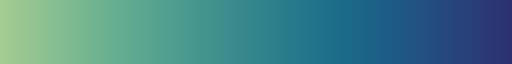

In [14]:
sns.color_palette("crest", as_cmap=True)

In [15]:
matplotlib.colors.to_hex(sns.color_palette("crest", as_cmap=True).colors[-1])

'#2c3172'

In [16]:
matplotlib.colors.BASE_COLORS['y']

(0.75, 0.75, 0)

In [17]:
mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])

(1.0, 1.0, 0.0)

In [18]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [416]:
start_color = mcolors.hex2color(mcolors.CSS4_COLORS['firebrick'])
# start_color = mcolors.hex2color(mcolors.CSS4_COLORS['crimson'])
start_color = sns.color_palette()[1]
start_color = sns.color_palette()[2]
# start_color = sns.color_palette()[5]
# start_color = sns.color_palette()[3]
middle_color = sns.color_palette()[7]
end_color = sns.color_palette()[4]
end_color = sns.color_palette()[0]
# end_color = mcolors.hex2color(mcolors.CSS4_COLORS['navy'])
# end_color = mcolors.hex2color(mcolors.CSS4_COLORS['blue'])
# end_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkblue'])
# end_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkgreen'])
# end_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkviolet'])

# aramco_color = sns.color_palette()[0]
aramco_color = sns.color_palette()[1]
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkblue'])
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkgreen'])
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkorchid'])
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkblue'])
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['gold'])
sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')

[(0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.16415224913494808, 0.6009688581314879, 0.2603921568627451),
 (0.15555555555555556, 0.5738562091503268, 0.35032679738562095),
 (0.146958861976163, 0.5467435601691657, 0.44026143790849676),
 (0.13856209150326798, 0.5202614379084968, 0.5281045751633988),
 (0.12996539792387543, 0.4931487889273356, 0.6180392156862746),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

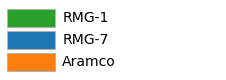

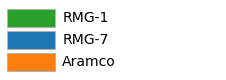

In [417]:

my_colors = {
    'RMG-1': start_color,
    'RMG-7': end_color,
    'Aramco': aramco_color,
}
plot_colortable(my_colors, ncols=1, sort_colors=False)

In [438]:

start  = 0.6
rotation = -0.4
gamma = 1.0
light = 0.7
dark = 0.3

start  = -0.3
rotation = -0.0
gamma = 1.2
light = 0.85
dark = 0.3

# start  = .5
# rotation = -0.5
# gamma = 1.2
# light = 0.8
# dark = 0.35
sns.color_palette(f"ch:s={start},r={rotation},gamma={gamma}, dark={dark}, light={light}", n_colors=7, desat=None, as_cmap=False)


[(0.756179481547424, 0.8411507135264029, 0.9165651417054953),
 (0.6261659004078405, 0.7441843212466466, 0.8489290862085089),
 (0.5040784783759108, 0.6428149347321661, 0.7659475559737762),
 (0.39964951474075894, 0.5459415815338031, 0.675780025762367),
 (0.3033205547308316, 0.4457242540483907, 0.5721116595796877),
 (0.22266609511371221, 0.35121573817848495, 0.46530726772997577),
 (0.15021350651289725, 0.2551987570397517, 0.3483762060577932)]

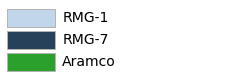

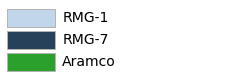

In [437]:
p = sns.color_palette(f"ch:s={start},r={rotation},gamma={gamma}, dark={dark}, light={light}", n_colors=7, desat=None, as_cmap=False)
q = sns.color_palette(f"ch:s={start},r={rotation * 2.0},gamma={gamma}, dark={dark}, light={light}", n_colors=7, desat=None, as_cmap=False)
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['magenta'])
# aramco_color = sns.cubehelix_palette(rot=.2)[2]
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['mediumorchid'])
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkorchid'])
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkviolet'])
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkgreen'])
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['green'])
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['forestgreen'])
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['orange'])
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['khaki'])
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['gold'])
aramco_color = sns.color_palette()[2]
# aramco_color = q[-2]
my_colors = {
    'RMG-1': p[0],
    'RMG-7': p[6],
    'Aramco': aramco_color,
}
plot_colortable(my_colors, ncols=1, sort_colors=False)

# Colors 1

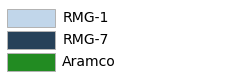

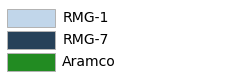

In [455]:
start  = -0.3
rotation = -0.0
gamma = 1.2
light = 0.85
dark = 0.3
colors = sns.color_palette(f"ch:s={start},r={rotation},gamma={gamma}, dark={dark}, light={light}", n_colors=7, desat=None, as_cmap=False)
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['forestgreen'])

my_colors = {
    'RMG-1': colors[0],
    'RMG-7': colors[6],
    'Aramco': aramco_color,
}
plot_colortable(my_colors, ncols=1, sort_colors=False)

In [456]:
colors

[(0.756179481547424, 0.8411507135264029, 0.9165651417054953),
 (0.6261659004078405, 0.7441843212466466, 0.8489290862085089),
 (0.5040784783759108, 0.6428149347321661, 0.7659475559737762),
 (0.39964951474075894, 0.5459415815338031, 0.675780025762367),
 (0.3033205547308316, 0.4457242540483907, 0.5721116595796877),
 (0.22266609511371221, 0.35121573817848495, 0.46530726772997577),
 (0.15021350651289725, 0.2551987570397517, 0.3483762060577932)]

# COLORS 2

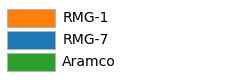

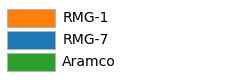

In [462]:
start_color = sns.color_palette()[1]
end_color = sns.color_palette()[0]
aramco_color = sns.color_palette()[2]
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')
my_colors = {
    'RMG-1': colors[0],
    'RMG-7': colors[6],
    'Aramco': aramco_color,
}
plot_colortable(my_colors, ncols=1, sort_colors=False)

In [461]:
colors

[(1.0, 0.4980392156862745, 0.054901960784313725),
 (0.8553171856978086, 0.4928719723183391, 0.16212226066897348),
 (0.7071895424836602, 0.4875816993464052, 0.27189542483660134),
 (0.5590618992695118, 0.48229142637447137, 0.3816685890042292),
 (0.41437908496732034, 0.477124183006536, 0.48888888888888893),
 (0.26625144175317184, 0.47183391003460207, 0.5986620530565168),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]

# COLORS 3

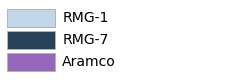

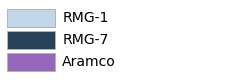

In [466]:
start  = -0.3
rotation = -0.0
gamma = 1.2
light = 0.85
dark = 0.3
colors = sns.color_palette(f"ch:s={start},r={rotation},gamma={gamma}, dark={dark}, light={light}", n_colors=7, desat=None, as_cmap=False)
aramco_color = sns.color_palette()[4]

my_colors = {
    'RMG-1': colors[0],
    'RMG-7': colors[6],
    'Aramco': aramco_color,
}
plot_colortable(my_colors, ncols=1, sort_colors=False)

In [467]:
colors

[(0.756179481547424, 0.8411507135264029, 0.9165651417054953),
 (0.6261659004078405, 0.7441843212466466, 0.8489290862085089),
 (0.5040784783759108, 0.6428149347321661, 0.7659475559737762),
 (0.39964951474075894, 0.5459415815338031, 0.675780025762367),
 (0.3033205547308316, 0.4457242540483907, 0.5721116595796877),
 (0.22266609511371221, 0.35121573817848495, 0.46530726772997577),
 (0.15021350651289725, 0.2551987570397517, 0.3483762060577932)]

# Colors 4

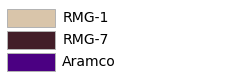

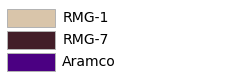

In [507]:
start  = 0.5
rotation = 0.3
gamma = 1.5
light = 0.85
dark = 0.3
colors = sns.color_palette(f"ch:s={start},r={rotation},gamma={gamma}, dark={dark}, light={light}", n_colors=7, desat=None, as_cmap=False)
aramco_color = sns.color_palette()[9]
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['indigo'])
# aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['black'])
my_colors = {
    'RMG-1': colors[0],
    'RMG-7': colors[6],
    'Aramco': aramco_color,
}
plot_colortable(my_colors, ncols=1, sort_colors=False)

In [508]:
colors

[(0.8505418222347113, 0.7736054510738077, 0.6675247017826718),
 (0.7717088258163877, 0.6345385730390076, 0.524437708345607),
 (0.6856409993777175, 0.4968982212725356, 0.4133533695409869),
 (0.5939156802316126, 0.3775801809524198, 0.3340199066625362),
 (0.48718030419067554, 0.2699521568240478, 0.26887503327899065),
 (0.37699267770617284, 0.18458912986816967, 0.2142989412554478),
 (0.2600966745600668, 0.11395455332225586, 0.1586033276570982)]

# Colors 5

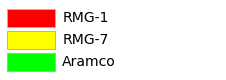

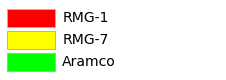

In [536]:

start_color = mcolors.hex2color(mcolors.CSS4_COLORS['red'])
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['lime'])
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')
my_colors = {
    'RMG-1': colors[0],
    'RMG-7': colors[6],
    'Aramco': aramco_color,
}
plot_colortable(my_colors, ncols=1, sort_colors=False)

In [538]:
colors

[(1.0, 0.0, 0.0),
 (1.0, 0.16470588235294117, 0.0),
 (1.0, 0.3333333333333333, 0.0),
 (1.0, 0.5019607843137255, 0.0),
 (1.0, 0.6666666666666666, 0.0),
 (1.0, 0.8352941176470589, 0.0),
 (1.0, 1.0, 0.0)]

# Colors 6

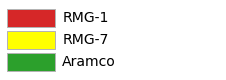

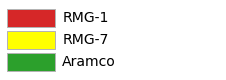

In [542]:
start_color = sns.color_palette()[3]
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])
aramco_color = sns.color_palette()[2]
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')
my_colors = {
    'RMG-1': colors[0],
    'RMG-7': colors[6],
    'Aramco': aramco_color,
}
plot_colortable(my_colors, ncols=1, sort_colors=False)

In [544]:
colors

[(0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.8656978085351787, 0.2924567474048443, 0.13102652825836217),
 (0.8928104575163399, 0.43529411764705883, 0.10457516339869281),
 (0.919923106497501, 0.5781314878892734, 0.07812379853902346),
 (0.9464052287581699, 0.7176470588235294, 0.052287581699346414),
 (0.9735178777393311, 0.860484429065744, 0.025836216839677045),
 (1.0, 1.0, 0.0)]

# Colors 7

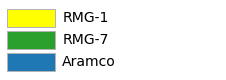

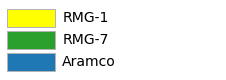

In [545]:
start_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])
end_color = sns.color_palette()[2]
aramco_color = sns.color_palette()[0]
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')
my_colors = {
    'RMG-1': colors[0],
    'RMG-7': colors[6],
    'Aramco': aramco_color,
}
plot_colortable(my_colors, ncols=1, sort_colors=False)

In [546]:
colors

[(1.0, 1.0, 0.0),
 (0.8637139561707036, 0.938638985005767, 0.028419838523644752),
 (0.7241830065359478, 0.8758169934640523, 0.05751633986928104),
 (0.5846520569011919, 0.8129950019223375, 0.08661284121491734),
 (0.4483660130718955, 0.7516339869281046, 0.11503267973856209),
 (0.3088350634371396, 0.6888119953863898, 0.1441291810841984),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]

# Colors 8

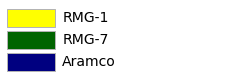

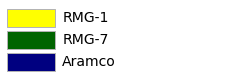

In [558]:
start_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])
end_color = sns.color_palette()[2]
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['darkgreen'])
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['navy'])
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')
my_colors = {
    'RMG-1': colors[0],
    'RMG-7': colors[6],
    'Aramco': aramco_color,
}
plot_colortable(my_colors, ncols=1, sort_colors=False)

In [559]:
colors

[(1.0, 1.0, 0.0),
 (0.8352941176470589, 0.8998846597462514, 0.0),
 (0.6666666666666667, 0.7973856209150327, 0.0),
 (0.4980392156862745, 0.6948865820838139, 0.0),
 (0.33333333333333337, 0.5947712418300654, 0.0),
 (0.16470588235294115, 0.49227220299884655, 0.0),
 (0.0, 0.39215686274509803, 0.0)]

# Colors 9

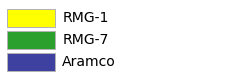

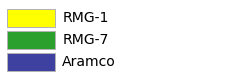

In [582]:
start_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])
end_color = sns.color_palette()[2]
aramco_color = (0.24728950403690886, 0.25553248750480584, 0.6328181468665898)
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')
my_colors = {
    'RMG-1': colors[0],
    'RMG-7': colors[6],
    'Aramco': aramco_color,
}
plot_colortable(my_colors, ncols=1, sort_colors=False)

In [579]:
colors

[(1.0, 1.0, 0.0),
 (0.8637139561707036, 0.938638985005767, 0.028419838523644752),
 (0.7241830065359478, 0.8758169934640523, 0.05751633986928104),
 (0.5846520569011919, 0.8129950019223375, 0.08661284121491734),
 (0.4483660130718955, 0.7516339869281046, 0.11503267973856209),
 (0.3088350634371396, 0.6888119953863898, 0.1441291810841984),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)]

In [571]:
c = sns.blend_palette([mcolors.CSS4_COLORS['aliceblue'], mcolors.CSS4_COLORS['navy'], mcolors.CSS4_COLORS['black']], n_colors=20, as_cmap=False, input='rgb')

In [581]:
c[7]

(0.24728950403690886, 0.25553248750480584, 0.6328181468665898)

In [291]:
np.ceil(3.3)

4.0

In [26]:
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = np.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

In [32]:
mcolors.BASE_COLORS

{'b': (0, 0, 1),
 'g': (0, 0.5, 0),
 'r': (1, 0, 0),
 'c': (0, 0.75, 0.75),
 'm': (0.75, 0, 0.75),
 'y': (0.75, 0.75, 0),
 'k': (0, 0, 0),
 'w': (1, 1, 1)}

In [43]:
aramco_color

(1.0, 0.0, 1.0)

In [34]:
dir(matplotlib.colors)

['BASE_COLORS',
 'BoundaryNorm',
 'CSS4_COLORS',
 'CenteredNorm',
 'ColorConverter',
 'Colormap',
 'FuncNorm',
 'Image',
 'LightSource',
 'LinearSegmentedColormap',
 'ListedColormap',
 'LogNorm',
 'NoNorm',
 'Normalize',
 'Number',
 'PngInfo',
 'PowerNorm',
 'Sequence',
 'Sized',
 'SymLogNorm',
 'TABLEAU_COLORS',
 'TwoSlopeNorm',
 'XKCD_COLORS',
 '_ColorMapping',
 '_REPR_PNG_SIZE',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_check_color_like',
 '_colors_full_map',
 '_create_lookup_table',
 '_is_nth_color',
 '_sanitize_extrema',
 '_to_rgba_no_colorcycle',
 '_vector_magnitude',
 '_warn_if_global_cmap_modified',
 'base64',
 'cbook',
 'cnames',
 'colorConverter',
 'copy',
 'from_levels_and_colors',
 'functools',
 'get_named_colors_mapping',
 'hex2color',
 'hexColorPattern',
 'hsv_to_rgb',
 'inspect',
 'io',
 'is_color_like',
 'itertools',
 'make_norm_from_scale',
 'mpl',
 'np',
 're',
 'rgb2hex',
 'rgb_to_hsv

In [36]:
mcolors.hex2color(mcolors.CSS4_COLORS['magenta'])

(1.0, 0.0, 1.0)

In [39]:
aramco_color

(1.0, 0.0, 1.0)

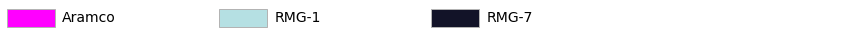

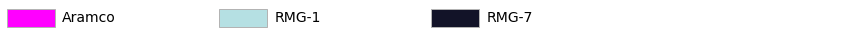

In [48]:
# aramco_color = mcolors.CSS4_COLORS['magenta']
aramco_color = mcolors.hex2color(mcolors.CSS4_COLORS['magenta'])


colors = colormaps.darkmint.colors
colors = colormaps.ice.discrete(10).colors[:-1][::-1]


# aramco_color = matplotlib.colors.to_hex(np.array([19, 91, 11]) / 256.0)
# aramco_color = matplotlib.colors.to_hex(np.array([55, 139, 46]) / 256.0)
# colors[0] = colormaps.ice.colors[:: -1][20]
# colors[1] = colormaps.ice.colors[:: -1][60]
# colors[2] = colormaps.ice.colors[:: -1][70]
# colors[3] = colormaps.ice.colors[:: -1][90]
# colors[4] = colormaps.ice.colors[:: -1][140]
# colors[5] = colormaps.ice.colors[:: -1][190]
colors[6] = colormaps.ice.colors[:: -1][240]
rmg1_color = colors[0]
rmg7_color = colors[6]

my_colors = {
    'Aramco': aramco_color,
    'RMG-1': rmg1_color,
    'RMG-7': rmg7_color,
}
plot_colortable(my_colors, sort_colors=False)

In [46]:
my_colors

{'Aramco': (1.0, 0.0, 1.0)}

In [24]:
temperatures[3]

687.84

In [26]:
temperatures[4]

696.12

In [24]:
run4_delay[3]

0.013249902123608149

In [ ]:
P = 7

colors = [matplotlib.colormaps['viridis'].colors[int(i / P * matplotlib.colormaps['viridis'].N)] for i in range(P)]


In [ ]:
colors[0]

In [ ]:
matplotlib.colormaps['viridis'].N

In [ ]:
matplotlib.colormaps['viridis'].colors

In [ ]:
dir(matplotlib.colormaps['viridis'])

In [ ]:
cmap

In [ ]:
[c for c in matplotlib.colormaps]

# With Lib

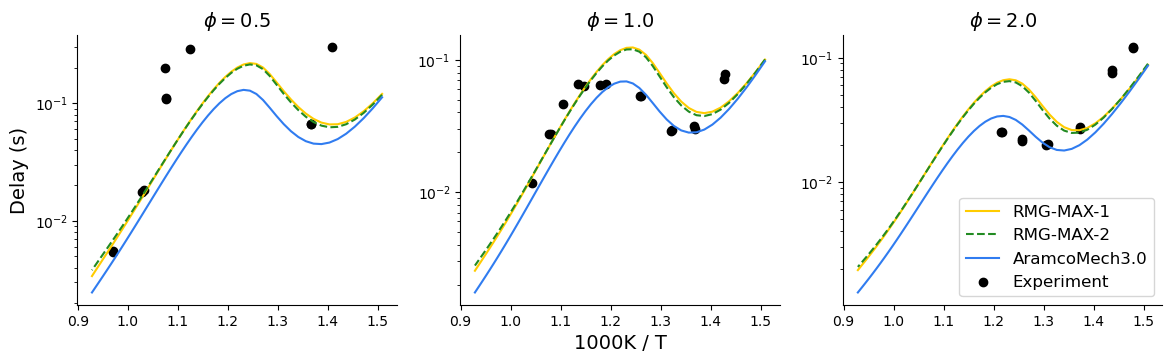

In [19]:
# read im the 12 datasets
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


P = 10
colors = [matplotlib.colormaps['viridis'].colors[:: -1][int(i / P * matplotlib.colormaps['viridis'].N)] for i in range(P)]
colors[0] = matplotlib.colormaps['viridis'].colors[:: -1][0]
colors[1] = matplotlib.colormaps['viridis'].colors[:: -1][30]
colors[2] = matplotlib.colormaps['viridis'].colors[:: -1][50]
colors[3] = matplotlib.colormaps['viridis'].colors[:: -1][90]
colors[4] = matplotlib.colormaps['viridis'].colors[:: -1][140]
colors[5] = matplotlib.colormaps['viridis'].colors[:: -1][190]
colors[6] = matplotlib.colormaps['viridis'].colors[:: -1][255]


start_color = mcolors.hex2color(mcolors.CSS4_COLORS['yellow'])  # make it yellow, but fade it 70% with alpha
# start_color = mcolors.hex2color(matplotlib.colors.BASE_COLORS['y'])
start_color = (1.0, 0.8, 0.0)
end_color = mcolors.hex2color(mcolors.CSS4_COLORS['forestgreen'])
aramco_color = (0.18627451, 0.48823529, 0.94117647)
colors = sns.blend_palette([start_color, end_color], n_colors=7, as_cmap=False, input='rgb')



fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))

for j, i in enumerate([4, 7, 10]):
    
    run0_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/with_lib/butane_20240401/table_{i:04}/base_delays_{i:04}.npy'
    run1_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/with_lib/butane_20240413/table_{i:04}/base_delays_{i:04}.npy'
    
    
    
    run0_delay = np.load(run0_npy)
    run1_delay = np.load(run1_npy)

    aramco_delay_npy = os.path.join(working_dir, 'aramco', f'table_{i:04}', f'base_delays_{i:04}.npy')
    aramco_delay = np.load(aramco_delay_npy)
    
    axes[j].plot(1000.0 / temperatures, run0_delay, label='RMG-MAX-1', color=start_color, linestyle='solid')
    axes[j].plot(1000.0 / temperatures, run1_delay, label='RMG-MAX-2', color=end_color, linestyle='dashed')
    axes[j].plot(1000.0 / temperatures, aramco_delay, label='AramcoMech3.0', color=aramco_color)
    

    # Scale the experimental delay by the pressure
    experiment_temperatures = df_exp[df_exp['Table'] == i]['T_C'].values
    experiment_delays = df_exp[df_exp['Table'] == i]['time (ms)'].values / 1000.0
    experiment_pressures_atm = df_exp[df_exp['Table'] == i]['chamber pressure? (bar)'].values * 100000 / 101325  # convert to atm
    nominal_pressures_atm = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values
    scaled_delays = np.zeros(len(experiment_delays))
    for k in range(len(experiment_temperatures)):
        scaled_delays[k] = scale_experimental_delay(experiment_delays[k], experiment_pressures_atm[k], nominal_pressures_atm[k], experiment_temperatures[k])
    
    axes[j].spines[['right', 'top']].set_visible(False)
    
    
#     axes[j].scatter(1000.0 / experiment_temperatures, experiment_delays, label='Experiment', color='black')
    axes[j].scatter(1000.0 / experiment_temperatures, scaled_delays, label='Experiment', color='black')
#     axes[j].scatter(1000.0 / experiment_temperatures, scaled_delays, label='Scaled Experiment', marker='+', color='blue')

    axes[j].set_yscale('log')
    
    
    phi = df_exp[df_exp['Table'] == i]['phi'].values[0]
    P0 = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values[0]
    axes[j].set_title(f'$\phi={phi}$', fontsize=14)
    

axes[1].set_xlabel('1000K / T', fontsize=14)

# axes[0, 0].set_title('P=10atm')
# axes[0, 1].set_title('P=20atm')
# axes[0, 2].set_title('P=30atm')

axes[0].set_ylabel('Delay (s)', fontsize=14)
plt.sca(axes[0])
# plt.legend(loc='lower right')
axes[2].legend(fontsize=12)
# plt.legend(loc='lower right', bbox_to_anchor=(3.95, 0), fontsize=12)

# Compare

In [ ]:
# read im the 12 datasets

# plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(4, 3, figsize=(14, 14))

# plt.clf()
for i in range(1, 13):
    row = int((i - 1) / 3)
    col = (i - 1) % 3

    run0_npy_no_lib = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240126/table_{i:04}/base_delays_{i:04}.npy'
    run5_npy_no_lib = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240423/table_{i:04}/base_delays_{i:04}.npy'
    run0_npy_lib = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/with_lib/butane_20240401/table_{i:04}/base_delays_{i:04}.npy'

    
    run0_no_lib_delay = np.load(run0_npy_no_lib)
    run5_no_lib_delay = np.load(run5_npy_no_lib)
    run0_lib_delay = np.load(run0_npy_lib)

    aramco_delay_npy = os.path.join(working_dir, 'aramco', f'table_{i:04}', f'base_delays_{i:04}.npy')
    aramco_delay = np.load(aramco_delay_npy)
    
    axes[row, col].plot(1000.0 / temperatures, run0_no_lib_delay, label='Run 0 No Lib')
    axes[row, col].plot(1000.0 / temperatures, run5_no_lib_delay, label='Run 5 No Lib')
    axes[row, col].plot(1000.0 / temperatures, run0_lib_delay, label='Run 0 With Lib')
#     axes[row, col].plot(1000.0 / temperatures, run2_delay, label='Run 2')
    axes[row, col].plot(1000.0 / temperatures, aramco_delay, label='Aramco')
    
#     plt.subplot(0)
#     plt.plot(1000.0 / temperatures, base_rmg_delay, label='Base RMG')

    # Scale the experimental delay by the pressure
    
    experiment_temperatures = df_exp[df_exp['Table'] == i]['T_C'].values
    experiment_delays = df_exp[df_exp['Table'] == i]['time (ms)'].values / 1000.0
    experiment_pressures_atm = df_exp[df_exp['Table'] == i]['chamber pressure? (bar)'].values * 100000 / 101325  # convert to atm
    nominal_pressures_atm = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values
    scaled_delays = np.zeros(len(experiment_delays))
    for j in range(len(experiment_temperatures)):
        scaled_delays[j] = scale_experimental_delay(experiment_delays[j], experiment_pressures_atm[j], nominal_pressures_atm[j], experiment_temperatures[j])
        
    
#     experiment_pressures = 
    
    axes[row, col].scatter(1000.0 / experiment_temperatures, experiment_delays, label='Experiment', marker='x', color='black')
    axes[row, col].scatter(1000.0 / experiment_temperatures, scaled_delays, label='Scaled Experiment', marker='+', color='blue')

    axes[row, col].set_yscale('log')
    

    
    
#     ax = plt.gca()
#     ax.set_yscale('log')
#     ax.set_ylim([0.00001, 0.1])
axes[1, 0].set_ylabel('Delay (s)')
axes[3, 1].set_xlabel('1000K / T')

axes[0, 0].set_title('P=10atm')
axes[0, 1].set_title('P=20atm')
axes[0, 2].set_title('P=30atm')

axes[0, 2].set_ylabel(r'$\phi=0.3$')
axes[0, 2].yaxis.set_label_position("right")
axes[1, 2].set_ylabel(r'$\phi=0.5$')
axes[1, 2].yaxis.set_label_position("right")
axes[2, 2].set_ylabel(r'$\phi=1.0$')
axes[2, 2].yaxis.set_label_position("right")
axes[3, 2].set_ylabel(r'$\phi=2.0$')
axes[3, 2].yaxis.set_label_position("right")

plt.sca(axes[0, 0])
plt.legend(loc='lower right')
#         plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))

# Aramco etc

In [ ]:
# read im the 12 datasets
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))

colors[6] = colors[7]
colors[7] = 'fuchsia'


# for j, i in enumerate([7, 10]):
for j, i in enumerate([4, 7, 10]):
    
    run0_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240126/table_{i:04}/base_delays_{i:04}.npy'
    run1_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240315/table_{i:04}/base_delays_{i:04}.npy'
    run2_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240403/table_{i:04}/base_delays_{i:04}.npy'
    run3_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240410/table_{i:04}/base_delays_{i:04}.npy'
    run4_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240416/table_{i:04}/base_delays_{i:04}.npy'
    run5_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240423/table_{i:04}/base_delays_{i:04}.npy'
    run6_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/butane_20240501/table_{i:04}/base_delays_{i:04}.npy'
    
    aramco_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/aramco/table_{i:04}/base_delays_{i:04}.npy'
    
    
    run0_delay = np.load(run0_npy)
    run1_delay = np.load(run1_npy)
    run2_delay = np.load(run2_npy)
    run3_delay = np.load(run3_npy)
    run4_delay = np.load(run4_npy)
    run5_delay = np.load(run5_npy)
    run6_delay = np.load(run6_npy)
    aramco_delay = np.load(aramco_npy)
    
    axes[j].plot(1000.0 / temperatures, run0_delay, label='RMG 1', color=colors[0])
    axes[j].plot(1000.0 / temperatures, run1_delay, label='RMG 2', color=colors[1])
    axes[j].plot(1000.0 / temperatures, run2_delay, label='RMG 3', color=colors[2])
    axes[j].plot(1000.0 / temperatures, run3_delay, label='RMG 4', color=colors[3])
    axes[j].plot(1000.0 / temperatures, run4_delay, label='RMG 5', color=colors[4])
    axes[j].plot(1000.0 / temperatures, run5_delay, label='RMG 6', color=colors[5])
    axes[j].plot(1000.0 / temperatures, run6_delay, label='RMG 7', color=colors[6])
    axes[j].plot(1000.0 / temperatures, aramco_delay, label='Aramco 3.0', color=colors[7], linestyle='dashed')
    

    # Scale the experimental delay by the pressure
    experiment_temperatures = df_exp[df_exp['Table'] == i]['T_C'].values
    experiment_delays = df_exp[df_exp['Table'] == i]['time (ms)'].values / 1000.0
    experiment_pressures_atm = df_exp[df_exp['Table'] == i]['chamber pressure? (bar)'].values * 100000 / 101325  # convert to atm
    nominal_pressures_atm = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values
    scaled_delays = np.zeros(len(experiment_delays))
    for k in range(len(experiment_temperatures)):
        scaled_delays[k] = scale_experimental_delay(experiment_delays[k], experiment_pressures_atm[k], nominal_pressures_atm[k], experiment_temperatures[k])
        
    
#     experiment_pressures = 
    
    axes[j].scatter(1000.0 / experiment_temperatures, experiment_delays, label='Experiment', color='black')
#     axes[j].scatter(1000.0 / experiment_temperatures, scaled_delays, label='Scaled Experiment', marker='+', color='blue')

    axes[j].set_yscale('log')
    
    
    phi = df_exp[df_exp['Table'] == i]['phi'].values[0]
    P0 = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values[0]
    axes[j].set_title(f'$\phi={phi}$', fontsize=14)
    

axes[1].set_xlabel('1000K / T', fontsize=14)

# axes[0, 0].set_title('P=10atm')
# axes[0, 1].set_title('P=20atm')
# axes[0, 2].set_title('P=30atm')

axes[0].set_ylabel('Delay (s)', fontsize=14)
plt.sca(axes[0])
# plt.legend(loc='lower right')
plt.legend(loc='lower right', bbox_to_anchor=(3.95, 0), fontsize=12)

In [ ]:
# read im the 12 datasets
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, axes = plt.subplots(1, 3, figsize=(14, 3.5))


colors[2] = 'fuchsia'

for j, i in enumerate([4, 7, 10]):
    
    run0_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/with_lib/butane_20240401/table_{i:04}/base_delays_{i:04}.npy'
    run1_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/with_lib/butane_20240413/table_{i:04}/base_delays_{i:04}.npy'
    aramco_npy = f'/work/westgroup/harris.se/autoscience/fuels/butane/official/aramco/table_{i:04}/base_delays_{i:04}.npy'
    
    
    
    run0_delay = np.load(run0_npy)
    run1_delay = np.load(run1_npy)
    aramco_delay = np.load(aramco_npy)
    
    axes[j].plot(1000.0 / temperatures, run0_delay, label='RMG 1', color=colors[0])
    axes[j].plot(1000.0 / temperatures, run1_delay, label='RMG 2', color=colors[1])
    axes[j].plot(1000.0 / temperatures, aramco_delay, label='Aramco 3.0', color=colors[2], linestyle='dashed')
    

    # Scale the experimental delay by the pressure
    experiment_temperatures = df_exp[df_exp['Table'] == i]['T_C'].values
    experiment_delays = df_exp[df_exp['Table'] == i]['time (ms)'].values / 1000.0
    experiment_pressures_atm = df_exp[df_exp['Table'] == i]['chamber pressure? (bar)'].values * 100000 / 101325  # convert to atm
    nominal_pressures_atm = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values
    scaled_delays = np.zeros(len(experiment_delays))
    for k in range(len(experiment_temperatures)):
        scaled_delays[k] = scale_experimental_delay(experiment_delays[k], experiment_pressures_atm[k], nominal_pressures_atm[k], experiment_temperatures[k])
        
    
#     experiment_pressures = 
    
    axes[j].scatter(1000.0 / experiment_temperatures, experiment_delays, label='Experiment', color='black')
#     axes[j].scatter(1000.0 / experiment_temperatures, scaled_delays, label='Scaled Experiment', marker='+', color='blue')

    axes[j].set_yscale('log')
    
    
    phi = df_exp[df_exp['Table'] == i]['phi'].values[0]
    P0 = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values[0]
    axes[j].set_title(f'$\phi={phi}$', fontsize=14)
    

axes[1].set_xlabel('1000K / T', fontsize=14)

# axes[0, 0].set_title('P=10atm')
# axes[0, 1].set_title('P=20atm')
# axes[0, 2].set_title('P=30atm')

axes[0].set_ylabel('Delay (s)', fontsize=14)
plt.sca(axes[0])
axes[2].legend(loc='lower right')
# plt.legend(loc='lower right', bbox_to_anchor=(3.95, 0), fontsize=12)



In [ ]:
# read im the 12 datasets

# plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(4, 3, figsize=(14, 14))

# plt.clf()
for i in range(1, 13):
    row = int((i - 1) / 3)
    col = (i - 1) % 3

    
    base_rmg_delay_npy = os.path.join(working_dir, 'base_rmg_1week', f'table_{i:04}', f'base_delays_{i:04}.npy')
    base_rmg_delay = np.load(base_rmg_delay_npy)

    improved_rmg_delay_npy = os.path.join(working_dir, 'improved_1week', f'table_{i:04}', f'base_delays_{i:04}.npy')
    improved_rmg_delay = np.load(improved_rmg_delay_npy)

    aramco_delay_npy = os.path.join(working_dir, 'aramco', f'table_{i:04}', f'base_delays_{i:04}.npy')
    aramco_delay = np.load(aramco_delay_npy)
    
    axes[row, col].plot(1000.0 / temperatures, base_rmg_delay, label='Base RMG')
    axes[row, col].plot(1000.0 / temperatures, improved_rmg_delay, label='Improved RMG')
    axes[row, col].plot(1000.0 / temperatures, aramco_delay, label='Aramco')
    
#     plt.subplot(0)
#     plt.plot(1000.0 / temperatures, base_rmg_delay, label='Base RMG')

    # Scale the experimental delay by the pressure
    
    experiment_temperatures = df_exp[df_exp['Table'] == i]['T_C'].values
    experiment_delays = df_exp[df_exp['Table'] == i]['time (ms)'].values / 1000.0
    experiment_pressures_atm = df_exp[df_exp['Table'] == i]['chamber pressure? (bar)'].values * 100000 / 101325  # convert to atm
    nominal_pressures_atm = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values
    scaled_delays = np.zeros(len(experiment_delays))
    for j in range(len(experiment_temperatures)):
        scaled_delays[j] = scale_experimental_delay(experiment_delays[j], experiment_pressures_atm[j], nominal_pressures_atm[j], experiment_temperatures[j])
        
    
#     experiment_pressures = 
    
    axes[row, col].scatter(1000.0 / experiment_temperatures, experiment_delays, label='Experiment', marker='x', color='black')
    axes[row, col].scatter(1000.0 / experiment_temperatures, scaled_delays, label='Scaled Experiment', marker='+', color='blue')

    axes[row, col].set_yscale('log')
    

    
    
#     ax = plt.gca()
#     ax.set_yscale('log')
#     ax.set_ylim([0.00001, 0.1])
axes[1, 0].set_ylabel('Delay (s)')
axes[3, 1].set_xlabel('1000K / T')

axes[0, 0].set_title('P=10atm')
axes[0, 1].set_title('P=20atm')
axes[0, 2].set_title('P=30atm')

axes[0, 2].set_ylabel(r'$\phi=0.3$')
axes[0, 2].yaxis.set_label_position("right")
axes[1, 2].set_ylabel(r'$\phi=0.5$')
axes[1, 2].yaxis.set_label_position("right")
axes[2, 2].set_ylabel(r'$\phi=1.0$')
axes[2, 2].yaxis.set_label_position("right")
axes[3, 2].set_ylabel(r'$\phi=2.0$')
axes[3, 2].yaxis.set_label_position("right")

plt.sca(axes[0, 0])
plt.legend(loc='lower right')
#         plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))

In [ ]:
# same thing but horizontal
# read im the 12 datasets

# plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(3, 4, figsize=(16, 9))

# plt.clf()
for i in range(1, 13):
    col = int((i - 1) / 3)
    row = (i - 1) % 3

    
    base_rmg_delay_npy = os.path.join(working_dir, 'base_rmg_1week', f'table_{i:04}', f'base_delays_{i:04}.npy')
    base_rmg_delay = np.load(base_rmg_delay_npy)

    improved_rmg_delay_npy = os.path.join(working_dir, 'improved_1week', f'table_{i:04}', f'base_delays_{i:04}.npy')
    improved_rmg_delay = np.load(improved_rmg_delay_npy)

    aramco_delay_npy = os.path.join(working_dir, 'aramco', f'table_{i:04}', f'base_delays_{i:04}.npy')
    aramco_delay = np.load(aramco_delay_npy)
    
    axes[row, col].plot(1000.0 / temperatures, base_rmg_delay, label='Base RMG')
    axes[row, col].plot(1000.0 / temperatures, improved_rmg_delay, label='Improved RMG')
    axes[row, col].plot(1000.0 / temperatures, aramco_delay, label='Aramco')
    
#     plt.subplot(0)
#     plt.plot(1000.0 / temperatures, base_rmg_delay, label='Base RMG')

    # Scale the experimental delay by the pressure
    
    experiment_temperatures = df_exp[df_exp['Table'] == i]['T_C'].values
    experiment_delays = df_exp[df_exp['Table'] == i]['time (ms)'].values / 1000.0
    experiment_pressures_atm = df_exp[df_exp['Table'] == i]['chamber pressure? (bar)'].values * 100000 / 101325  # convert to atm
    nominal_pressures_atm = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values
    scaled_delays = np.zeros(len(experiment_delays))
    for j in range(len(experiment_temperatures)):
        scaled_delays[j] = scale_experimental_delay(experiment_delays[j], experiment_pressures_atm[j], nominal_pressures_atm[j], experiment_temperatures[j])
        
    
#     experiment_pressures = 
    
    axes[row, col].scatter(1000.0 / experiment_temperatures, experiment_delays, label='Experiment', marker='x', color='black')
    axes[row, col].scatter(1000.0 / experiment_temperatures, scaled_delays, label='Scaled Experiment', marker='+', color='blue')

    axes[row, col].set_yscale('log')
    

    
    
#     ax = plt.gca()
#     ax.set_yscale('log')
#     ax.set_ylim([0.00001, 0.1])
axes[0, 0].set_ylabel('Delay (s)')
axes[1, 0].set_ylabel('Delay (s)')
axes[2, 0].set_ylabel('Delay (s)')
axes[2, 0].set_xlabel('1000K / T')
axes[2, 1].set_xlabel('1000K / T')
axes[2, 2].set_xlabel('1000K / T')
axes[2, 3].set_xlabel('1000K / T')
# plt.sca(axes[2, 0])
# plt.text(2.0, 0.001, '1000K / T')  # this is in data coordinates

axes[0, 3].set_ylabel('P=10atm')
axes[1, 3].set_ylabel('P=20atm')
axes[2, 3].set_ylabel('P=30atm')
axes[0, 3].yaxis.set_label_position("right")
axes[1, 3].yaxis.set_label_position("right")
axes[2, 3].yaxis.set_label_position("right")


axes[0, 0].set_title(r'$\phi=0.3$')
axes[0, 1].set_title(r'$\phi=0.5$')
axes[0, 2].set_title(r'$\phi=1.0$')
axes[0, 3].set_title(r'$\phi=2.0$')


# axes[0, 2].set_ylabel(r'$\phi=0.3$')
# axes[0, 2].yaxis.set_label_position("right")
# axes[1, 2].set_ylabel(r'$\phi=0.5$')
# axes[1, 2].yaxis.set_label_position("right")
# axes[2, 2].set_ylabel(r'$\phi=1.0$')
# axes[2, 2].yaxis.set_label_position("right")
# axes[3, 2].set_ylabel(r'$\phi=2.0$')
# axes[3, 2].yaxis.set_label_position("right")

plt.sca(axes[0, 0])
plt.legend(loc='lower right')
#         plt.legend(loc='lower right', bbox_to_anchor=(1.0, 0.0))




## Just 2x3

In [ ]:
# Just 2,3
# same thing but horizontal
# read im the 12 datasets

# plt.figure(figsize=(12, 10))
fig, axes = plt.subplots(2, 3, figsize=(14, 7))

# plt.clf()
for i in range(1, 13):
    
    col = int((i - 1) / 3)
    row = (i - 1) % 3

    
    if col == 0:
        continue
    if row == 2:
        continue
        
    col -= 1
    
    base_rmg_delay_npy = os.path.join(working_dir, 'base_rmg_1week', f'table_{i:04}', f'base_delays_{i:04}.npy')
    base_rmg_delay = np.load(base_rmg_delay_npy)

    improved_rmg_delay_npy = os.path.join(working_dir, 'improved_1week', f'table_{i:04}', f'base_delays_{i:04}.npy')
    improved_rmg_delay = np.load(improved_rmg_delay_npy)

    aramco_delay_npy = os.path.join(working_dir, 'aramco', f'table_{i:04}', f'base_delays_{i:04}.npy')
    aramco_delay = np.load(aramco_delay_npy)
    
    axes[row, col].plot(1000.0 / temperatures, base_rmg_delay, label='Base RMG')
    axes[row, col].plot(1000.0 / temperatures, improved_rmg_delay, label='Improved RMG')
    axes[row, col].plot(1000.0 / temperatures, aramco_delay, label='Aramco')


    # Scale the experimental delay by the pressure
    
    experiment_temperatures = df_exp[df_exp['Table'] == i]['T_C'].values
    experiment_delays = df_exp[df_exp['Table'] == i]['time (ms)'].values / 1000.0
    experiment_pressures_atm = df_exp[df_exp['Table'] == i]['chamber pressure? (bar)'].values * 100000 / 101325  # convert to atm
    nominal_pressures_atm = df_exp[df_exp['Table'] == i]['nominal pressure(atm)'].values
    scaled_delays = np.zeros(len(experiment_delays))
    for j in range(len(experiment_temperatures)):
        scaled_delays[j] = scale_experimental_delay(experiment_delays[j], experiment_pressures_atm[j], nominal_pressures_atm[j], experiment_temperatures[j])
        
    
#     axes[row, col].scatter(1000.0 / experiment_temperatures, experiment_delays, label='Experiment', marker='x', color='black')
    axes[row, col].scatter(1000.0 / experiment_temperatures, scaled_delays, label='Experiment', marker='x', color='black')

    axes[row, col].set_yscale('log')
    
axes[0, 0].set_ylabel('Delay (s)')
axes[1, 0].set_ylabel('Delay (s)')
axes[1, 0].set_xlabel('1000K / T')
axes[1, 1].set_xlabel('1000K / T')
axes[1, 2].set_xlabel('1000K / T')

axes[0, 2].set_ylabel('P=10atm')
axes[1, 2].set_ylabel('P=20atm')
axes[0, 2].yaxis.set_label_position("right")
axes[1, 2].yaxis.set_label_position("right")


axes[0, 0].set_title(r'$\phi=0.5$')
axes[0, 1].set_title(r'$\phi=1.0$')
axes[0, 2].set_title(r'$\phi=2.0$')


plt.sca(axes[0, 0])
plt.legend(loc='lower right')




In [ ]:
delay3 = np.load(os.path.join(working_dir, 'base_rmg_1week', f'table_0002', f'base_delays_0002.npy'))
delay6 = np.load(os.path.join(working_dir, 'base_rmg_1week', f'table_0005', f'base_delays_0005.npy'))

In [ ]:
delay6 - delay3

In [ ]:
axes[3]

In [ ]:


for i in [9]:
    # read in the three datasets
    base_rmg_delay_data = os.path.join(working_dir, 'base_rmg', f'table_{i}_smooth.csv')
    improved_rmg_delay_data = os.path.join(working_dir, 'improved_rmg', f'table_{i}_smooth.csv')
    aramco_delay_data = os.path.join(working_dir, 'aramco', f'table_{i}_smooth.csv')
    
    base_rmg_df = pd.read_csv(base_rmg_delay_data)
    if 'Unnamed: 0' in base_rmg_df.keys():  
        base_rmg_df = base_rmg_df.drop(columns=['Unnamed: 0'])
    improved_rmg_delay_data = pd.read_csv(improved_rmg_delay_data)
    if 'Unnamed: 0' in improved_rmg_delay_data.keys():  
        improved_rmg_delay_data = improved_rmg_delay_data.drop(columns=['Unnamed: 0'])
    aramco_delay_data = pd.read_csv(aramco_delay_data)
    if 'Unnamed: 0' in base_rmg_df.keys():  
        aramco_delay_data = aramco_delay_data.drop(columns=['Unnamed: 0'])
    
#     print(base_rmg_df['T'].values), len(improved_rmg_df['T'].values), len(aramco_df['T'].values))

In [ ]:
base_rmg_df['T'].values

In [ ]:


for i in range(1, 13):
    plt.clf()
    # read in the three datasets
    base_rmg_delay_data = os.path.join(working_dir, 'base_rmg', f'table_{i}_smooth.csv')
    improved_rmg_delay_data = os.path.join(working_dir, 'improved_rmg', f'table_{i}_smooth.csv')
    aramco_delay_data = os.path.join(working_dir, 'aramco', f'table_{i}_smooth.csv')
    
    base_rmg_df = pd.read_csv(base_rmg_delay_data)
    if 'Unnamed: 0' in base_rmg_df.keys():  
        base_rmg_df = base_rmg_df.drop(columns=['Unnamed: 0'])
    improved_rmg_df = pd.read_csv(improved_rmg_delay_data)
    if 'Unnamed: 0' in improved_rmg_df.keys():  
        improved_rmg_df = improved_rmg_df.drop(columns=['Unnamed: 0'])
    aramco_df = pd.read_csv(aramco_delay_data)
    if 'Unnamed: 0' in aramco_df.keys():  
        aramco_df = aramco_df.drop(columns=['Unnamed: 0'])

        
    # get the experimental data    
    exp_table = df_exp[df_exp['Table'] == i]
    
    # plot the ignition delay
    N = 51
    if i == 9:
        plt.scatter(1000.0 / base_rmg_df['T'].values, base_rmg_df['delay(ms)'].values)
        plt.scatter(1000.0 / improved_rmg_df['T'].values[N:2 * N], improved_rmg_df['delay(ms)'].values[N:2 * N])
        plt.scatter(1000.0 / aramco_df['T'].values[2 * N:3 * N], aramco_df['delay(ms)'].values[2 * N:3 * N])
    else:
    
        plt.plot(1000.0 / base_rmg_df['T'].values, base_rmg_df['delay(ms)'].values)
        plt.plot(1000.0 / improved_rmg_df['T'].values[N:2 * N], improved_rmg_df['delay(ms)'].values[N:2 * N])
        plt.plot(1000.0 / aramco_df['T'].values[2 * N:3 * N], aramco_df['delay(ms)'].values[2 * N:3 * N])
#     plt.plot(1000.0 / T7, base_rmg7, marker='x', linestyle='dashed')
#     plt.plot(1000.0 / T7, aramco7, marker='x')
    plt.scatter(1000.0 / exp_table['T_C'].values, exp_table['time (ms)'].values.astype(float) / 1000.0, color='black', marker='x')
    ax = plt.gca()
    ax.set_yscale('log')
    
    plt.legend(['Base RMG', 'Improved RMG', 'Aramco', 'Experiment'])
    plt.title('Ignition Delays $\phi$=' + str(base_rmg_df['phi'].values[0]))
    plt.xlabel('1000K / T')
    plt.ylabel('Delay (s)')
    plt.savefig(f'table_{i}.png')

#     print(base_rmg_df)

In [ ]:
len(1000.0 / aramco_delay_data['T'].values)

In [ ]:
plt.plot(1000.0 / base_rmg_df['T'].values[:])

In [ ]:
base_rmg_df['delay(ms)'].values[:]

In [ ]:
# plot the ignition delay
plt.plot(1000.0 / T7, delays, marker='x')
plt.plot(1000.0 / T7, base_rmg7, marker='x', linestyle='dashed')
plt.plot(1000.0 / T7, aramco7, marker='x')
plt.scatter(1000.0 / T7, tau7 / 1000.0, color='black')
ax = plt.gca()
ax.set_yscale('log')
plt.legend(['New Calculations', 'Base RMG', 'Aramco', 'Experiment'])
plt.title('Ignition Delays $\phi$=1.0')
plt.xlabel('1000K / T')
plt.ylabel('Delay (s)')
plt.savefig('table7.png')
